In [1]:
#preamble 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor
import pandas as pd


## n = 2
q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
qc = []
qc.append(QuantumCircuit(q, c))



count = 0
for i in range(10):
    for j in range(5):
        qc[count].id(0)
        qc[count].id(1)
        qc.append(QuantumCircuit(q,c))
    count = count + 1

# Do it for both qubits
       





In [2]:
#defining circuits

def circuit(n_circ,n_idgate): 
    qc = []
    for i in range(n_circ):  # no. of circuits
        n = 2
        q = QuantumRegister(n, 'q')
        c = ClassicalRegister(n, 'c')
        qc.append(QuantumCircuit(q,c))
        for j in range(n_idgate):
            qc[i].id(0)
            qc[i].id(1)
        qc[i].measure(q,c)
        
    return(qc)
        
    


 
    

In [3]:
# 5 to 20 identity gates

In [4]:
#saving account
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-11-02 21:38:23,248: Credentials already present. Set overwrite=True to overwrite.


In [5]:
#loading account
IBMQ.load_account()




<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
#checking backends
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
path = '/Users/student/Documents/summer_research/circuit_results/project2_files/15_diff_id_gates/'

In [12]:
backend = provider.get_backend('ibmq_ourense')
output = []
for i in range(1,15):
    n = 75 # total number of circuits for each number of identity gates. 
    circ = circuit(n, i)
    job_exp = qiskit.execute(circ,backend=backend,shots = 8132)
    print(i)
    job_monitor(job_exp)
    output = job_exp.result().get_counts()
    df = pd.DataFrame(output)
    df.to_csv(path + str(i) + 'idgates.csv')
    
    
    
    
      
    
    



    


1
Job Status: job has successfully run               
2
Job Status: job has successfully run                  
3
Job Status: job has successfully run                        
4
Job Status: job has successfully run                  
5
Job Status: job has successfully run                        
6
Job Status: job has successfully run                        
7
Job Status: job has successfully run                  
8
Job Status: job has successfully run                        
9
Job Status: job has successfully run                        
10
Job Status: job has successfully run                        
11
Job Status: job has successfully run                        
12
Job Status: job has successfully run                          
13
Job Status: job has successfully run                        
14
Job Status: job has successfully run                        


In [4]:
def csv_to_dict(filename, PATH):  
    outcome = []
    output = []
    import csv
    with open(PATH + filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            row = row[1:5]
            outcome.append(row)

    for i in range(1,len(outcome)):
        for j in range(len(outcome[0])):
            if outcome[i][j] == '':
                outcome[i][j] = 0
            else:    
                outcome[i][j] = int(float(outcome[i][j]))
        output.append(dict(zip(outcome[0], outcome[i])))
    return output       
        

In [5]:
csv_to_dict(str(i) + "idgates.csv", path1)

[{'10': 166, '00': 7863, '11': 3, '01': 100},
 {'10': 153, '00': 7887, '11': 2, '01': 90},
 {'10': 161, '00': 7890, '11': 2, '01': 79},
 {'10': 144, '00': 7912, '11': 6, '01': 70},
 {'10': 151, '00': 7903, '11': 1, '01': 77},
 {'10': 164, '00': 7896, '11': 2, '01': 70},
 {'10': 165, '00': 7878, '11': 2, '01': 87},
 {'10': 149, '00': 7912, '11': 2, '01': 69},
 {'10': 162, '00': 7903, '11': 2, '01': 65},
 {'10': 176, '00': 7875, '11': 2, '01': 79},
 {'10': 141, '00': 7901, '11': 4, '01': 86},
 {'10': 162, '00': 7889, '11': 3, '01': 78},
 {'10': 159, '00': 7893, '11': 1, '01': 79},
 {'10': 150, '00': 7890, '11': 3, '01': 89},
 {'10': 169, '00': 7879, '11': 4, '01': 80},
 {'10': 145, '00': 7906, '11': 2, '01': 79},
 {'10': 138, '00': 7916, '11': 0, '01': 78},
 {'10': 140, '00': 7915, '11': 2, '01': 75},
 {'10': 161, '00': 7899, '11': 3, '01': 69},
 {'10': 148, '00': 7913, '11': 5, '01': 66},
 {'10': 140, '00': 7892, '11': 3, '01': 97},
 {'10': 148, '00': 7896, '11': 2, '01': 86},
 {'10': 1

In [9]:
#finding the probabilty for p00,p01,p10,p11
#takes data(dictionary) and gives a list of dictionary with probabilities. 

def shots_to_prob_dict(data):
    for i in range(len(data)):
        if '00' in data[i]:
            data[i]['00'] = data[i]['00']/8132
        if '01' in data[i]:
            data[i]['01'] = data[i]['01']/8132
        if '10' in data[i]:
            data[i]['10'] = data[i]['10']/8132
        if '11' in data[i]:
            data[i]['11'] = data[i]['11']/8132
    return data
 

In [10]:
#test
shots_to_prob_dict(csv_to_dict("1idgates.csv", path1))

[{'10': 0.02041318248893261,
  '00': 0.9669208066896212,
  '11': 0.0003689129365469749,
  '01': 0.012297097884899164},
 {'10': 0.01881455976389572,
  '00': 0.969872110181997,
  '11': 0.00024594195769798326,
  '01': 0.011067388096409248},
 {'10': 0.019798327594687654,
  '00': 0.970241023118544,
  '11': 0.00024594195769798326,
  '01': 0.00971470732907034},
 {'10': 0.017707820954254796,
  '00': 0.9729463846532218,
  '11': 0.0007378258730939498,
  '01': 0.008607968519429415},
 {'10': 0.018568617806197736,
  '00': 0.971839645843581,
  '11': 0.00012297097884899163,
  '01': 0.009468765371372355},
 {'10': 0.02016724053123463,
  '00': 0.970978848991638,
  '11': 0.00024594195769798326,
  '01': 0.008607968519429415},
 {'10': 0.02029021151008362,
  '00': 0.9687653713723561,
  '11': 0.00024594195769798326,
  '01': 0.010698475159862272},
 {'10': 0.018322675848499753,
  '00': 0.9729463846532218,
  '11': 0.00024594195769798326,
  '01': 0.008484997540580424},
 {'10': 0.019921298573536646,
  '00': 0.971

#Reason behind relative entropy (defining p_0,p_0',p_1,p_1'  to get q00,q01,...)
p_00 = p_0 * p_0’

Independent events: 


In |0>

p_0 = p_00 + p_10
p_1 = p_01 + p_11


In |1>

p_0’ = p_00 + p_01
p_1’ = p_10 + p_11




If we have independent events:

p_0 * p_0’ = q00
p_0 * p_1’ = q10
p_1 * p_0’ = q01
p_1 * p_1’ = q11


If equal then no correlation. If deviation between two of them then it gives us the correlation.




Syntax:
p_x’ = prob of measuring of getting x in the second qubit(|1>)
p_x =  prob of measuring of getting x in the first qubit(|0>)




In [11]:
#creating list for p_0,p_0_, p_1, p_1_
#It takes the dictionary of probabilities and datas p_0,p_0_, p_1, p_1_

def prob_dict_to_list(data):

    p_0 = []
    p_0_= []
    p_1 = []
    p_1_ = []

    for i in range(len(data)):
        if '00' in data[i] and '01' in data[i]:
            p_0_.append(data[i]['00'] + data[i]['01'])
        elif '00' in data[i]:
            p_0_.append(data[i]['00'])
        elif '01' in data[i]:
            p_0_.append(data[i]['00'])
        else:
            p_0_.append(0)
        if '10' in data[i] and '11' in data[i]:
            p_1_.append(data[i]['10'] + data[i]['11'])
        elif '10' in data[i]:
            p_1_.append(data[i]['10'])
        elif '11' in data[i]:
            p_1_.append(data[i]['11'])
        else:
            p_1_.append(0)
        if '00' in data[i] and '10' in data[i]:
            p_0.append(data[i]['00'] + data[i]['10'])
        elif '00' in data[i]:
            p_0.append(data[i]['00'])
        elif '10' in data[i]:
            p_0.append(data[i]['10'])
        else:
            p_0.append(0)
        if '01' in data[i] and '11' in data[i]:
            p_1.append(data[i]['01'] + data[i]['11'])
        elif '01' in data[i]:
            p_1.append(data[i]['01'])
        elif '11' in data[i]:
            p_1.append(data[i]['11'])
        else:
            p_1.append(0)
    return(p_0,p_0_,p_1,p_1_)



In [12]:
prob_dict_to_list(shots_to_prob_dict(csv_to_dict("1idgates.csv", path1)))

([0.9873339891785539,
  0.9886866699458927,
  0.9900393507132317,
  0.9906542056074766,
  0.9904082636497787,
  0.9911460895228726,
  0.9890555828824397,
  0.9912690605017216,
  0.9917609444171176,
  0.9900393507132317,
  0.9889326119035908,
  0.9900393507132317,
  0.9901623216920807,
  0.9886866699458927,
  0.9896704377766847,
  0.9900393507132317,
  0.9904082636497786,
  0.9905312346286277,
  0.9911460895228726,
  0.9912690605017216,
  0.9877029021151008,
  0.9891785538612887,
  0.9893015248401377,
  0.9879488440727988,
  0.9885636989670438,
  0.9901623216920807,
  0.9900393507132317,
  0.9904082636497786,
  0.9910231185440236,
  0.9922528283325135,
  0.9905312346286276,
  0.9890555828824398,
  0.9911460895228726,
  0.9910231185440236,
  0.9915150024594196,
  0.9894244958189867,
  0.9888096409247418,
  0.9906542056074766,
  0.9867191342843089,
  0.9894244958189867,
  0.9886866699458927,
  0.9913920314805706,
  0.9890555828824398,
  0.9924987702902115,
  0.9894244958189867,
  0.991883

In [137]:
#double checking the length of p_0, p_1...
len(p_0),len(p_0_),len(p_1),len(p_1_)

(75, 75, 75, 75)

In [25]:
#defining the q_s based on the independence of the events. 
#takes the p_0, p_0_, p_1, p_1_ (probabiliies of each qubits (|0> and |1>)) and outputs expected probabilities without
#the presence of noise 


#input is prob_dict_to_list(shots_to_prob_dict(csv_to_dict("1idgates.csv", path1)))

'''
q00 = p_0 * p_0’  
q10 = p_0 * p_1’ 
q01 = p_1 * p_0’ 
q11 = p_1 * p_1’ 

'''
def expected_p_to_q(data):
    q00 = []
    q01 = []
    q10 = []
    q11 = []
    q = []
    for i in range(len(data[0])):
        q00.append(data[0][i] * data[1][i])
        q01.append(data[2][i] * data[1][i])
        q10.append(data[0][i] * data[3][i])
        q11.append(data[2][i] * data[3][i])
        
    
    for j in range(len(q00)):
        q.append([q00[j],q01[j],q10[j],q11[j]])
    
    return(q)


In [26]:
expected_p_to_q(prob_dict_to_list(shots_to_prob_dict(csv_to_dict("1idgates.csv", path1))))

[[0.9668151199986257,
  0.012402784575894688,
  0.020518869179928137,
  0.00026322624555145073],
 [0.9698418059712723,
  0.011097692307133962,
  0.018844863974620433,
  0.00021563774697326864],
 [0.9701947351000667,
  0.00976099534754756,
  0.019844615613164876,
  0.000199653939220762],
 [0.9723809480028134,
  0.009173405169837863,
  0.01827325760466324,
  0.00017238922268550231],
 [0.9718959596563249,
  0.009412451558628424,
  0.018512303993453806,
  0.00017928479159292236],
 [0.9709136435242504,
  0.008673173986817124,
  0.02023244599862234,
  0.000180736490310274],
 [0.9687441856441996,
  0.01071966088801862,
  0.020311397238239968,
  0.00022475622954163337],
 [0.9728625641741564,
  0.008568818019645838,
  0.018406496327565167,
  0.00016212147863256754],
 [0.9717598629015732,
  0.008072896567192237,
  0.020001081515544427,
  0.00016615901569020167],
 [0.9683685434792234,
  0.00974262228565608,
  0.021670807234008268,
  0.0002180270011122432],
 [0.9712991602648771,
  0.01087004780201

In [16]:
#making the list of p00, p01,p10,p11 (the datas from IBM Q)
#and create p (list of p00,p01,p10,p11 for each output)


#takes shots_to_prob_dict(csv_to_dict("1idgates.csv", path1)) as input

def p_from_IBM(data):
    p00 = []
    p01 = []
    p10 = []
    p11 = []
    p = []

    for i in range(len(data)):
        if '00' in data[i]:
            p00.append(data[i]['00'])
        else: 
            p00.append(0)
        if '01' in data[i]:
            p01.append(data[i]['01'])
        else: 
            p01.append(0)
        if '10' in data[i]:
            p10.append(data[i]['10'])
        else: 
            p10.append(0)
        if '11' in data[i]:
            p11.append(data[i]['11'])
        else: 
            p11.append(0)
        
    for j in range(len(p00)):
        p.append([p00[j],p01[j],p10[j],p11[j]])
   


    return(p)
  

In [17]:
p_from_IBM(shots_to_prob_dict(csv_to_dict("1idgates.csv", path1)))

[[0.9669208066896212,
  0.012297097884899164,
  0.02041318248893261,
  0.0003689129365469749],
 [0.969872110181997,
  0.011067388096409248,
  0.01881455976389572,
  0.00024594195769798326],
 [0.970241023118544,
  0.00971470732907034,
  0.019798327594687654,
  0.00024594195769798326],
 [0.9729463846532218,
  0.008607968519429415,
  0.017707820954254796,
  0.0007378258730939498],
 [0.971839645843581,
  0.009468765371372355,
  0.018568617806197736,
  0.00012297097884899163],
 [0.970978848991638,
  0.008607968519429415,
  0.02016724053123463,
  0.00024594195769798326],
 [0.9687653713723561,
  0.010698475159862272,
  0.02029021151008362,
  0.00024594195769798326],
 [0.9729463846532218,
  0.008484997540580424,
  0.018322675848499753,
  0.00024594195769798326],
 [0.971839645843581,
  0.007993113625184456,
  0.019921298573536646,
  0.00024594195769798326],
 [0.9683964584358091,
  0.00971470732907034,
  0.02164289227742253,
  0.00024594195769798326],
 [0.971593703885883,
  0.01057550418101328,


In [46]:
#calculation of the relative entropy
'''
p = p_from_IBM(shots_to_prob_dict(csv_to_dict("1idgates.csv", path1)))
q = expected_p_to_q(prob_dict_to_list(shots_to_prob_dict(csv_to_dict("1idgates.csv", path1))))
 
'''

def relative_entropy(p,q):
    X = []
    D = []
    Rel_entro = []
    

    A = len(q)
    # A is the number of measurements which doesn't have three zeros. 
    for i in range(A):
        if p[i] or q[i] != 0.0:
            X.append([p[i][0] * (np.log(p[i][0]/q[i][0])), p[i][1] * (np.log(p[i][1]/q[i][1])), 
                    p[i][2] * (np.log(p[i][2]/q[i][2])), p[i][3] * (np.log(p[i][3]/q[i][3]))])
        else:
            X.append(0)
        
    for i in range(len(X)):
        Rel_entro.append(sum(X[i]))
    return(Rel_entro)

In [42]:
0 * np.log(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [47]:
p = p_from_IBM(shots_to_prob_dict(csv_to_dict("1idgates.csv", path1)))
q = expected_p_to_q(prob_dict_to_list(shots_to_prob_dict(csv_to_dict("1idgates.csv", path1))))

In [48]:
relative_entropy(p,q)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


[1.956867455026753e-05,
 2.102355314081693e-06,
 5.158395275242659e-06,
 0.0005341276810157099,
 1.0205734577033473e-05,
 1.0911393739221746e-05,
 1.0007533256730217e-06,
 1.9281808670452454e-05,
 1.722142909054489e-05,
 1.7737256462406646e-06,
 0.00016124600045905286,
 5.7337844156470444e-05,
 1.51925079373205e-05,
 4.859646985886431e-05,
 0.00012970199786777113,
 1.1151619642731821e-05,
 nan,
 1.7599909511407843e-05,
 8.03764316721218e-05,
 0.00037860499069842336,
 4.604182618744382e-05,
 5.165049535235447e-06,
 1.900624138109934e-06,
 3.018038234388827e-07,
 4.1897487508548865e-06,
 1.0915498839914938e-05,
 1.7056508635624254e-05,
 6.624757337333234e-05,
 9.024383413077451e-06,
 0.00029853562320095937,
 4.483077885727237e-06,
 1.5779625760210622e-05,
 0.00023712586113699567,
 4.532972543207354e-06,
 1.7865928922181505e-05,
 nan,
 0.00011391558964185744,
 9.009123621091196e-05,
 0.0003201658447233795,
 2.4915663899886537e-05,
 1.8907319803890496e-05,
 7.439182908396293e-05,
 8.685853

In [49]:
def mean_n_sd(RE):
    Y_ = [x for x in RE if x == x]
    Y_

    return(np.mean(Y_),np.std(Y_))



In [50]:
mean_n_sd(relative_entropy(p,q))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


(8.838136415981006e-05, 0.00013259871864811524)

In [61]:
def re_for(csv_file, path):
    csv_to_dict(csv_file, path)
    p = p_from_IBM(shots_to_prob_dict(csv_to_dict(csv_file, path)))
    q = expected_p_to_q(prob_dict_to_list(shots_to_prob_dict(csv_to_dict(csv_file, path))))
    return(mean_n_sd(relative_entropy(p,q)))
        

In [62]:
re_for_all("1idgates.csv", path1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


(8.838136415981006e-05, 0.00013259871864811524)

In [70]:
def rel_entro_for_all(path):
    xbar_sd = []
    for i in range(1,7):
        csv_to_dict(str(i) + "idgates.csv", path)
        p = p_from_IBM(shots_to_prob_dict(csv_to_dict(str(i)+"idgates.csv", path)))
        q = expected_p_to_q(prob_dict_to_list(shots_to_prob_dict(csv_to_dict(str(i) + "idgates.csv", path))))
        xbar_sd.append(mean_n_sd(relative_entropy(p,q)))
    return xbar_sd
        

In [71]:
rel_entro_for_all(path1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


[(8.838136415981006e-05, 0.00013259871864811524),
 (8.467635818908762e-05, 0.00015482545933098008),
 (9.722161731427708e-05, 0.00012975441089113578),
 (0.00010532295202169476, 0.0001333229389029208),
 (6.79707310569067e-05, 9.364781722276825e-05),
 (8.61020366521263e-05, 0.00015819670812674175)]

In [ ]:
list1 = [1,2,3,4,5]
df = pd.DataFrame(list1)
df.to_csv('filename.csv', index=False)

In [74]:
df = pd.DataFrame(rel_entro_for_all(path1))
df.to_csv(path1 +  "RE_for_6_diff_id.csv")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


In [69]:
x = np.linspace(0,5.5,10)
y = 10*np.exp(-x)
yerr = np.random.random_sample(10)



fig, ax = plt.subplots()


ax.errorbar(x, y,
            yerr=yerr,
            fmt='-o')


ax.set_xlabel('No. of identity gates')
ax.set_ylabel('Relative entropy')
ax.set_title('Line plot with error bars')


plt.show()

NameError: name 'plt' is not defined

In [117]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Make the dataframe for evaluation on Errorbars 
df = pd.DataFrame({  
    'mean': [0.00011262033122316862,7.459153699994953e-05, 0.00012346106748283676     ,0.0011071830667655044 ], 
    'std': [0.0001499346984512427,7.703743712790897e-05,  0.0001393114280365509  ,5.95237759610749e-09 ]}) 
  
print(df)

       mean           std
0  0.000113  1.499347e-04
1  0.000075  7.703744e-05
2  0.000123  1.393114e-04
3  0.001107  5.952378e-09


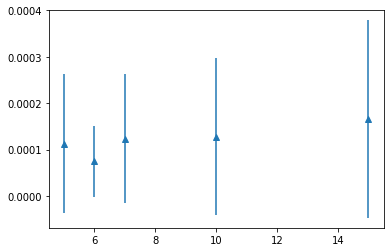

In [118]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5, 6, 7, 10, 15])
y = np.array([0.00011262033122316862,7.459153699994953e-05, 0.00012346106748283676 ,0.00012800186340509843, 0.00016565630235214893]) 
e = np.array([0.0001499346984512427,7.703743712790897e-05,  0.0001393114280365509  ,0.00016896914052333056, 0.00021305375361176305])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()